**Лабораторная работа 1**

по дисциплине "Технологии аналитической обработки информации"

Выполнил: студент группы КЭ-403 Зусман Михаил Дмитриевич

**Задание:**
Разработать программу, которая выполняет поиск частых наборов объектов в заданном наборе данных с помощью алгоритма Apriori (или одной из его модификаций).



---
В данной работе используются следующие датасеты:

http://fimi.uantwerpen.be/data/retail.dat

http://fimi.uantwerpen.be/data/kosarak.dat

Github:

In [1]:
#Устанавливаем пакет Apyori для использования Association Mining Apriori алгоритма
!pip install apyori  

# подключаем необходимые библиотеки
import pandas as pd
from apyori import apriori
import time
import matplotlib.pyplot as plt

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=5918a86b28c3f83a8c9df1538aa5b87e148093000b942472439b9aa5d7d83137
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [2]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Задаем уровни поддержки
min_sp=[0.01, 0.03, 0.05 ,0.1, 0.15, 0.20]

Определим общие функции


In [4]:
#функция сортировки по поддержке
def sort_supp(association_results):
  for i in range(len(association_results)-1):
    for j in range(0,len(association_results)-i-1):
      if association_results[j][1] < association_results[j+1][1] : 
        association_results[j], association_results[j+1] = association_results[j+1], association_results[j] 
  return association_results

In [5]:
def print_results(association_results):

  for item in association_results:
    
    pair = item[0] 
    items = [x for x in pair]

    # Ассоциативное правило
    print("Rule: " + str(items))

    #Значение поддержки
    print("Support: " + str(item[1]))

    #Confidence и Lift
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

# Работа с датасетом reatail.dat


In [6]:
retailDatContent = [i.strip().split() for i in open('/content/drive/MyDrive/Colab Notebooks/retail.dat').readlines()]


In [7]:
print(retailDatContent[0])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']


Запустим алгоритм Apriori для набора данных с разным уровнем поддержки.

In [9]:
# Создадим результирующие структуры данных для разничных 

time_retail =[]
list_result_retail=[]

for i in min_sp:
    start=time.perf_counter()
    list_result_retail.append(list( apriori(retailDatContent, min_support=i, min_confidence=0.2, min_lift=1.1)))
    end=time.perf_counter()
    time_r = end -start
    time_retail.append(time_r)

Выведем количество ассоциативных правил, полученных в результате работы алгоритма,при разных пороговых значениях поддержки.

In [10]:
list_count_of_rules_retail=[]
for j in range(len(min_sp)):
  print('Count of rules(min_support='+str( min_sp[j])+'): '+str(len(list_result_retail[j]))+'\n')
  list_count_of_rules_retail.append(len(list_result_retail[j]))


Count of rules(min_support=0.01): 77

Count of rules(min_support=0.03): 16

Count of rules(min_support=0.05): 8

Count of rules(min_support=0.1): 4

Count of rules(min_support=0.15): 1

Count of rules(min_support=0.2): 1



Отсортируем полученные результатыпо поддержке в порядке убывания значений.

In [11]:
list_print_result=[]

for k in range(len(min_sp)):
  print("min support: "+str(min_sp[k])+"______________________________________________________________________________________________________________________\n")
  print_results(sort_supp(list_result_retail[k]))

min support: 0.01______________________________________________________________________________________________________________________

Rule: ['48', '39']
Support: 0.33055057734624893
Confidence: 0.5750764676862358
Lift: 1.2032726128908013
Rule: ['41', '39']
Support: 0.12946620993171662
Confidence: 0.22523926985693143
Lift: 1.3287082307880087
Rule: ['38', '39']
Support: 0.1173408044282117
Confidence: 0.663311105411644
Lift: 1.15399770449534
Rule: ['48', '41']
Support: 0.10228896803611533
Confidence: 0.6034125125460019
Lift: 1.2625620963825945
Rule: ['32', '48']
Support: 0.0911276967400921
Confidence: 0.5297026438979363
Lift: 1.1083337959257116
Rule: ['48', '41', '39']
Support: 0.0835507361448243
Confidence: 0.4928738708598194
Lift: 1.4910694599802141
Rule: ['38', '48', '39']
Support: 0.06921349334180259
Confidence: 0.3912541677353167
Lift: 1.1836438794825679
Rule: ['32', '48', '39']
Support: 0.06127356457430639
Confidence: 0.6389118864577173
Lift: 1.3368399129912252
Rule: ['38', '41']

Построеним график зависимости быстродействия работы алгоритма от минимильной поддержки.

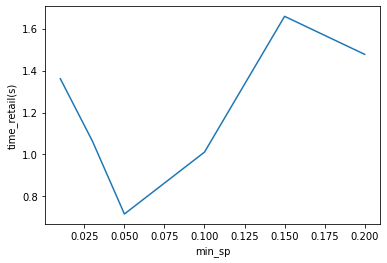

In [12]:
fig, ax = plt.subplots()
ax.plot(min_sp,time_retail)
ax.set(xlabel='min_sp', ylabel='time_retail(s)')
plt.show()

Построение графика зависимости количества наборов от минимильной поддержки.

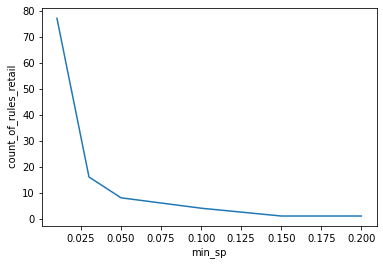

In [13]:
fig, ax = plt.subplots()
ax.plot(min_sp, list_count_of_rules_retail)
ax.set(xlabel='min_sp', ylabel=' count_of_rules_retail')
plt.show()

Вывод: исходя из полученных данных можно скзать, что правило ['48', '39'] является наиболее часто встречающимся. 

# Работа с датасетом kosarak.dat

Повторим действия проделанные над датасетом retail над датасетом kosarak.

In [14]:
kosarakDatContent = [i.strip().split() for i in open('/content/drive/MyDrive/Colab Notebooks/kosarak.dat').readlines()]

In [15]:
print(kosarakDatContent[20])

['11', '70', '6']


Запустим алгоритм Apriori для набора данных с разным уровнем поддержки.

In [16]:

time_kosarak =[]
min_sp=[0.01, 0.03, 0.05 ,0.1, 0.15, 0.20]

list_result_kosarak=[]

for i in min_sp:
    start=time.perf_counter()
    list_result_kosarak.append(list( apriori(kosarakDatContent, min_support=i, min_confidence=0.2, min_lift=1.1)))
    end=time.perf_counter()
    time_r = end -start
    time_kosarak.append(time_r)

Выведем количество ассоциативных правил, полученных в результате работы алгоритма, при разных пороговых значениях поддержки.

In [19]:
list_count_of_rules_kosarak=[]
for j in range(len(min_sp)):
  print('Count of rules(min_support='+str( min_sp[j])+'): '+str(len(list_result_kosarak[j]))+'\n')
  list_count_of_rules_kosarak.append(len(list_result_kosarak[j]))


Count of rules(min_support=0.01): 291

Count of rules(min_support=0.03): 39

Count of rules(min_support=0.05): 20

Count of rules(min_support=0.1): 3

Count of rules(min_support=0.15): 1

Count of rules(min_support=0.2): 1



Полученные результаты отсортируем по поддержке в порядке убывания значений.

In [20]:
list_print_result=[]

for k in range(len(min_sp)):
  print("min support: "+str(min_sp[k])+"______________________________________________________________________________________________________________________\n")
  print_results(sort_supp(list_result_kosarak[k]))



min support: 0.01______________________________________________________________________________________________________________________

Rule: ['11', '6']
Support: 0.3272851974036416
Confidence: 0.889986678203068
Lift: 1.4651258474666244
Rule: ['3', '11', '6']
Support: 0.14513304013527245
Confidence: 0.3946602941782374
Lift: 1.4733934706879983
Rule: ['1', '6']
Support: 0.1334472051571613
Confidence: 0.668852077236966
Lift: 1.1010866684771057
Rule: ['11', '1']
Support: 0.09280991351532623
Confidence: 0.4651734996607973
Lift: 1.264946355763912
Rule: ['11', '1', '6']
Support: 0.08696144048193842
Confidence: 0.43586030923137675
Lift: 1.3317446456150879
Rule: ['218', '6']
Support: 0.0784594374556819
Confidence: 0.8767127926138287
Lift: 1.443273932882492
Rule: ['6', '7']
Support: 0.07435338514467647
Confidence: 0.8470850882644019
Lift: 1.3944998146776124
Rule: ['148', '6']
Support: 0.06540390827493278
Confidence: 0.9260318640771146
Lift: 1.5244646384780047
Rule: ['218', '11']
Support: 0.0622

Построение графика зависимости быстродействия от минимильной поддержки.

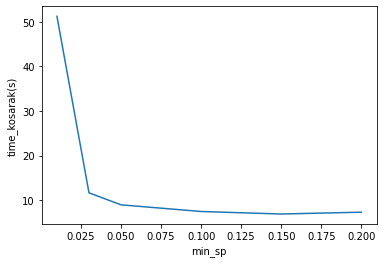

In [21]:
fig, ax = plt.subplots()
ax.plot(min_sp,time_kosarak)
ax.set(xlabel='min_sp', ylabel='time_kosarak(s)')
plt.show()

Построение графика зависимости количества наборов от минимильной поодержки.

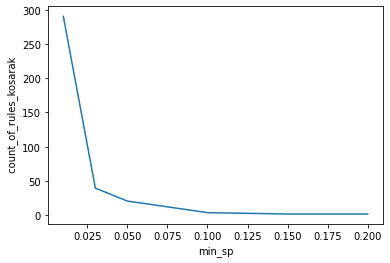

In [22]:
fig, ax = plt.subplots()
ax.plot(min_sp, list_count_of_rules_kosarak)
ax.set(xlabel='min_sp', ylabel=' count_of_rules_kosarak')
plt.show()

Вывод: исходя из полученных данных можно скзать, что правило ['11', '6'] является наиболее часто встречающимся.Также, исходя из графиков видно, что быстродействие программы сильно зависит от уровня минимальной поддержки, выше поддержка тем быстрее работает алгоритм. Исследуя про график зависимости количества наборов от минимальной поддержки, можно увидеть следующую зависимость: чем ниже уровень минимальной поддержки тем больше наборов правил можно найти.